# Part 4- A/B Testing

Import all libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##  4.1 Using “AB_Test” sheet in the shared excel file, what is the possible metric you can create for A/B testing excluding no. of clicks and no. of visitors. (Any derived metric from the given no.of clicks and visitors )
Perform an AB testing to find which variation whether control or treatment is better.


Load the data

In [50]:
# Reading the dataset
df = pd.read_excel("../data/assignment.xlsx", sheet_name="AB_Test")

# Displaying the data
df.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177


## Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### Check Missing values

In [38]:
df.isna().sum()

Date          0
Address       0
Variations    0
DeviceType    0
Clicks        0
Visitors      0
dtype: int64

There are no missing values in the data set

### Check Duplicates



In [39]:
df.duplicated().sum()

0

There are no duplicate values in the data set

### Check Data Types



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        18099 non-null  datetime64[ns]
 1   Address     18099 non-null  object        
 2   Variations  18099 non-null  object        
 3   DeviceType  18099 non-null  object        
 4   Clicks      18099 non-null  int64         
 5   Visitors    18099 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 848.5+ KB


### Check number of unique values in each column



In [41]:
df.nunique()

Date            18
Address        211
Variations       2
DeviceType       4
Clicks         722
Visitors      1705
dtype: int64

### Check Statistics of Dataset



In [53]:
df.describe()

,Clicks,Visitors
count,18099.000000,18099.000000
mean,55.521023,479.477485
std,377.760167,5705.466343
min,0.000000,1.000000
25%,0.000000,3.000000
50%,2.000000,13.000000
75%,12.000000,79.000000
max,11190.000000,211849.000000


In [67]:
df.head()

,Date,Address,Variations,DeviceType,Clicks,Visitors
0,2023-04-09,fyttlyf/business/campaign/campaigns-business/c...,Control,Desktop,146,1189
1,2023-04-09,fyttlyf/business/campaign/get-paid///,Treatment,Mobile,19,1389
2,2023-04-09,fyttlyf/business/campaign/campaigns-business/s...,Control,Desktop,134,5752
3,2023-04-09,fyttlyf/business/product/business-financial-se...,Control,Mobile,123,462
4,2023-04-09,fyttlyf/business/product/business-accept-payme...,Control,Mobile,126,3177


In [151]:
new_df = df.drop(columns=["DeviceType", "Address"])
new_df = new_df.groupby(by=["Variations", "Date"]).sum()
new_df["Interaction Rate"] = new_df["Clicks"] / new_df["Visitors"]
print(new_df.head())
new_df = new_df.reset_index().pivot_table(index="Date", columns="Variations", values="Interaction Rate")
new_df

                       Clicks  Visitors  Interaction Rate
Variations Date                                          
Control    2023-03-29   50405    498197          0.101175
           2023-03-30   46887    453442          0.103402
           2023-03-31   47251    482210          0.097988
           2023-04-01   34902    374771          0.093129
           2023-04-02   34312    362153          0.094744


Variations,Control,Treatment
Date,,
2023-03-29,0.101175,0.241116
2023-03-30,0.103402,0.249690
2023-03-31,0.097988,0.240635
2023-04-01,0.093129,0.215076
2023-04-02,0.094744,0.208578
2023-04-03,0.113199,0.261988
2023-04-04,0.115882,0.253008
2023-04-05,0.117796,0.255065
2023-04-06,0.097732,0.234196


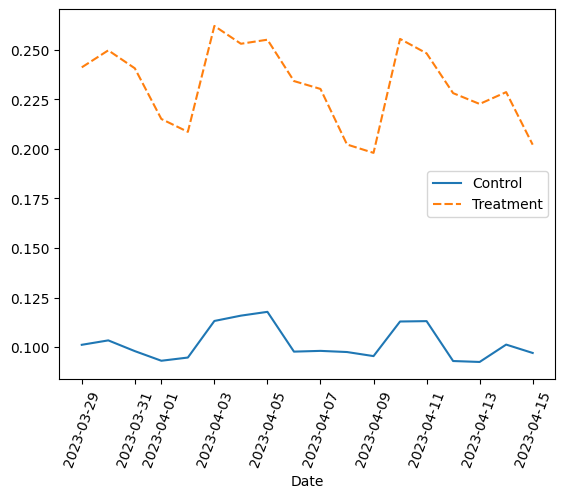

In [180]:

sns.lineplot(new_df)
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [184]:
plot_df = df.groupby(by="Variations").count()["Visitors"]
# df.groupby(by="Variations").count()["Date"].plot(kind="pie", subplots=True, autopct=True)
plot_df

Variations
Control      10547
Treatment     7552
Name: Visitors, dtype: int64